<a href="https://colab.research.google.com/github/janania/PDFtoText/blob/main/XX__Demo_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------
Demo: _OPENAI_
====================

Intro
-----

OpenAI is a popular provider of AI tools, most notably ChatGPT. It is on the vanguard of the tranformations that advances in AI are bringing to our lives. It is also notable for further blurring the line between code and language.

In this lesson we're going to acess several major OpenAI products in code: GPT, ChatGPT, DALL-E, and the text-to-speech tool TTS.  We'll tell jokes, make an audiobook, and get help on your homework for this class.

OpenAI is a paid API: every request costs money.  Fortunately,
* For now, OpenAI provides free credits to new users.
* It is cheap at the scales we're operating. This assignment costs roughly 10¢-20¢ to run.




### Strategy

OpenAI is built with its API in mind. We'll use it to access it products programmatically.  The main accomplishment of this code will be to give you code snippets that work, that you can easily change to do useful things on your own.



# OpenAI in Python

## Boilerplate code (just run; you don't have to understand)
#### You will probably have to "Runtime -> Restart session" after running this the first time for everything to work

The code in this boilerplate, and most code in this demo, will look longer and more complicated than the code in previous modules. That's going to make it look scarier. But the truth is that nothing has changed: the code has always been there, we're just not insulating you from it as much. It's no longer under the hood. Your approach should be the same as when you didn't know it was complicated: you don't have to understand this code. It is doing the right things in the right places. It's worth skimming that you know how to change the most interesting inputs, but you won't be evaluated on your ability to reproduce or even comprehend this code.

So just run this code. It will set up everything below to work smoothly.

#### GPT Completion and Chat installs

In [ ]:
!pip install --quiet openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
!pip install --quiet langchain langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.5/229.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [ ]:
!pip install --user --quiet git+https://github.com/SocialScienceWithOnlineData/image_play.git

  Preparing metadata (setup.py) ... done


#### Image generation installs

In [ ]:
!pip install --quiet opencv-python
!pip install --user --quiet git+https://github.com/SocialScienceWithOnlineData/image_play.git

  Preparing metadata (setup.py) ... done


#### Audio book installs

In [ ]:
!pip install --user --quiet --upgrade git+https://github.com/SocialScienceWithOnlineData/project_gutenberg_play.git

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install --quiet pydub

#### General imports

In [ ]:
import os
import json

from ipywidgets import FileUpload
from io import BytesIO

In [ ]:
import random

In [ ]:
from openai import OpenAI

#### GPT Completion and Chat imports

In [ ]:
from langchain.chains.conversation.memory import ConversationBufferMemory
from langchain import LLMChain, PromptTemplate
from langchain_openai import OpenAI as OpenAIChat

#### DALL-E and Vision imports

#### **If you get an error here, just do "Runtime -> Restart session" and re-run everything for this to work**


In [ ]:
from image_play import *

In [ ]:
import base64

#### Audio book imports

In [ ]:
from pydub import AudioSegment

In [ ]:
from google.colab import files

In [ ]:
from project_gutenberg_play import *

## Authentication

For this demo to work, you have already registered as an OpenAI user (you have verified your email address and phone number), gotten API keys, and plugged them into your authentication file. You can accomplish these tasks by following a guide or just registering on openai.com and clicking around.

There's also a guide [here](https://0w.uk/vkqzf) with blank authentication file [here](https://0w.uk/tam7a).

### How to authenticate once you've registered

After getting your account and creating an OpenAI secret key, you will use a personal text file called `webScienceAuthentication.txt` to run this notebook. It can be as simple as a text file with the following pasted in:
```
{

	"openai" : {

		"secretKey": "YOUR_KEY"

	}

}
```

with `YOUR_KEY` looking something like `sk-SGXkQPXAGFWnqwihRdGRnwIPGFWnqwihRdGRnwIP`. Keep that file handy.

Running the code blocks below, you will click the file chooser and upload your `webScienceAuthentication.txt`.  Once you do that, you should be able to authenticate with OpenAI by running the code that follows, and you should be able to run all the code in this demo. With this approach, your keys stay quite secret.

In [ ]:
# Have webScienceAuthentication.txt handy for when you run this code block.
# When a file-chooser appears, give it your file and you should be good
uploaded = FileUpload(multiple=False)
uploaded

FileUpload(value={}, description='Upload')

For the rest of the code below to work, you have to click <i class="fa fa-upload"> Upload (0)</i> and load your `webScienceAuthentication.txt` file.  When you've selected a file, it will change to  <i class="fa fa-upload"> Upload (1)</i> and you can run the next code block.

In [ ]:
# You don't have to understand this line, but it turns your data file into a Python dictionary
auth_pers = json.loads(uploaded.data[0])
# from https://platform.openai.com/docs/quickstart?context=python
os.environ["OPENAI_API_KEY"] = auth_pers['openai']['secretKey']

With your keys uploaded we can now present them to OpenAI and start our session.

In [ ]:
openai_client = OpenAI() # 🚀

That very last line is the most important.  The `openai_client` variable is your link to OpenAI.  Every command you run below that access the site will mention this object. That is how the site routes and monitors your usage.

## Knock-knock joke completion

For our first demonstration of OpenAI in code, we're going to have GPT tell us some jokes. In the code below we set up several variations of the classic knock-knock joke format.  See how it does!


In [ ]:
knock_knock_template="""
Q: Knock knock
A: Who's there?
Q: {gag}
A: {gag} who?
Q:
"""

As-is, the code below sets up "Boo Who" by assigning `'boo'` to `gag`, which will end up being use to replace the `{gag}` fillers in `knock_knock_template` above. To try one of the other jokes you have to comment out `gag = 'boo'` and uncomment one of the others. **or try it on another knock-knock joke of your own design!**

In [ ]:
gag = 'boo'
#gag = 'orange'  # note how it gets this one wrong sort of.
#gag = 'wooden shoe'
#gag = 'Amish'
#gag = 'The interrupting sheep'
#gag = 'the chicken'
#gag = 'Benjamin Franklin' # not a part of a known knock-knock joke, I was just curious what it would come up with.

This is some setup

In [ ]:
knock_knock_setup = knock_knock_template.format(gag=gag)

This is where we officially send the query to OpenAI (note 🚀)

In [ ]:
knock_knock = openai_client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=knock_knock_setup,
    max_tokens = 10
) # 🚀

#### The Joke!

In [ ]:
print(knock_knock_setup)

In [ ]:
knock_knock.choices[0].text

### Batching calls

Above, if you ran more than one joke, you ran more than one call to OpenAI.  Because calls cost money, OpenAI let you batch them, treating many "jobs" as one "job", letting you complete many jokes at once, and save money.

In [ ]:
kkt = knock_knock_template

In [ ]:
gags = [
    kkt.format(gag='boo'),
    kkt.format(gag='orange'),
    kkt.format(gag='wooden shoe'),
    kkt.format(gag='Amish'),
    kkt.format(gag='The interrupting sheep'),
    kkt.format(gag='the chicken'),
    kkt.format(gag='Benjamin Franklin'),
]

In [ ]:
response = openai_client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=gags,
    max_tokens = 10
) # 🚀

In [ ]:
for joke, punchline in zip(gags, response.choices):
    print(">>>", joke, punchline.text)
    print()

## Thought completion (How smart is it?)

The "*I*" in "*AI*" refers of course to "Intelligence".  It doesn't take long interacting with OpenAI products to realize that intelligence means many different things.  While it can provide strikingly humanlike responses and is very able in many tasks, there are other seemingly simple tasks at which it does not meet the intelligence bar.

In this application we use task completion with the same batching functionality to pose analogies of varying difficulty. These give a great sense of what GPT can do.

In [ ]:
analogies = [
    "8 is to 16 as 1 is to ",
    "8 is to 16 as 3 is to ",
    "8 is to 16 as 16 is to ",
    "32 is to 16 as 16 is to ",
    "16 is to 8 as 8 is to ",
    "16 is to 8 as 3 is to ",
    "finger is to hand as toe is to ",
    "yesterday is to today as today is to ",
    "Vegas is to LA as Reno is to ",
    "Apple is to Android as Mercedes is to ",
    "'thank you' is to 'you're welcome' as 'I'm sorry' is to ",
    "aaa is to aab as bba is to", # what would you answer?  bbb?  cca?  bbz?  aab?
]

In [ ]:
response = openai_client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=analogies,
    max_tokens = 3
) # 🚀

In [ ]:
for analogy, choice in zip(analogies, response.choices):
    print(">>>", analogy, choice.text)

## Making a chat bot
While GPT is for completion, ChatGPT is for interaction.  While there are many useful purposes for this, a fun one is to create conversation agents.

This one translates everyday tasks into code, blurring the line between code and life in just the way this course tries to do.

### Life as code



With this code, we are using ChatGPT to create a bot that describes social situations with "pseudo" code.

You can change this code to change the bot.



In [ ]:
personality="You are a bot that responds to descriptions of social situations with pseudocode descriptions of those situations. {prompt}"

This code sets up the bot with the personality you define:

In [ ]:
personality_prompt_template = PromptTemplate(input_variables=["chat_history","prompt"], template=personality)
memory = ConversationBufferMemory(memory_key="chat_history")
# max_tokens is roughly the number of words in the answer. Increase it or decrease it for a more or less verbose response.
personality_chain = LLMChain(llm=OpenAIChat(max_tokens=100), prompt=personality_prompt_template, memory=memory )

Here is where the action is: We're going to `invoke()` the bot by asking it questions.  This is going to create a session in which it remembers your past questions (note the `memory` variable above) and can refer to and build off them. Let's ask our ChatGPT bot what to do when we suddenly find ourselves in front of a door not knowing what to do.

In [ ]:
print( personality_chain.invoke("Sometimes at a door I can't tell whether I'm supposed to push or pull.")['text'] ) # 🚀

It can also help us survive having roommates, and life's other curveballs

In [ ]:
print( personality_chain.invoke("Someone ate my ice cream from the freezer, even though it was clearly labeled.  How do I figure out who?")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("Nice weather, isn't it?")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("I have to buy something at the grocery store")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("I met someone who says they're my long lost twin")['text'] ) # 🚀

### Difficult personalities

I've drafted a few personalities below, and conversed with each. As your conversation will unfold differently than mine did, I'm putting sample prompts and responses below, and will let you carry on your conversation in its own way.

If you don't like the bot getting cut off mid thought, increase `max_tokens`, which more or less corresponds to the number of words allowed in the answer.

In [ ]:
personality="You are a world famous detective. But you're incapable of normal conversation and make everything about you. {prompt}"
#personality="You are a prominent therapist known for suggesting recipes for your patient's ailments. {prompt}"
#personality="You're a civil engineer who is expert in large-scale concrete construction: dams, sky scrapers, etc. You're also into juvenile insults, like 'I'm rubber and you're glue. Everything you say bounces off of me and sticks to you'. {prompt}"

In [ ]:
personality_prompt_template = PromptTemplate(input_variables=["chat_history","prompt"], template=personality)
memory = ConversationBufferMemory(memory_key="chat_history")
# Increase or decrease max_tokens for a more or less verbose response.
personality_chain = LLMChain(llm=OpenAIChat(max_tokens=100), prompt=personality_prompt_template, memory=memory )

In [ ]:
print( personality_chain.invoke("Nice weather, isn't it?")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("But it's raining")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("Someone ate my ice cream from the freezer, even though it was clearly labeled.  How do I figure out who?")['text'] ) # 🚀

In [ ]:
print( personality_chain.invoke("Umm, the ice cream mystery. Can you help me solve it?")['text'] )# 🚀

In [ ]:
print( personality_chain.invoke("Sometimes at a door I can't tell whether I'm supposed to push or pull. Any advice for solving that mystery?")['text'] ) # 🚀

## Interactive homework help

I've known better conversationalist than ChatGPT, but it knows Python *really* well. This is in part because a major part of it's training was based on the programming help community StackExchange.  Here we give it a multiple choice question from earlier in this course and ask it several questions: What's the right answer, why is it the right answer, and why is some other answer wrong.

### The Question in Question
Below we enter a question and its answers. I pulled one from earlier in this course.

In [ ]:
problem = """
growing_lists3 — try it
What is the value of groceryList?

  groceryList = []
  groceryList.extend( ['apples', 'butter'] )
  groceryList.append( ['bread'] )
  groceryList.append( ['dishsoap'] )
"""

answers = """
1. ['dishsoap', 'bread', 'apples', 'butter']
2. [ [], 'dishsoap', 'bread', 'butter', 'apples']
3. ['apples', 'butter', ['bread'], ['dishsoap']]
4. [ [], 'apples', 'butter', 'bread', 'dishsoap']
"""

### Setup
Then we get everything into a format recognized by ChatGPT

In [ ]:
hw_template = """You are a helpful programming assistant.

{chat_history}

The problem is
""" + problem + """

The options are
""" +answers + """

The student question is:
{student_question}
"""

In [ ]:
hw_prompt_template = PromptTemplate(input_variables=["chat_history", "student_question"], template=hw_template)
hw_memory = ConversationBufferMemory(memory_key="chat_history")

hw_chain = LLMChain(
    llm=OpenAIChat(),
    prompt=hw_prompt_template,
    verbose=False,
    memory=hw_memory,
)

### Our Questions about the Question in Question

I've come up with three questions about this question. Obviously you should have your own.

In [ ]:
student_question_1 = "What choice is the right answer, and why?"
print( student_question_1 )
print( ''.join(hw_chain.invoke(student_question_1)['text']) ) # 🚀

In [ ]:
student_question_2 = "In answer 3, why are the last two entries in the list also in lists?"
print( student_question_2 )
print( ''.join(hw_chain.invoke(student_question_2)['text']) ) # 🚀

In [ ]:
student_question_3 = "Please explain why 4 is not the right answer. It has all the elements in the right order."
print( student_question_3 )
print( ''.join(hw_chain.invoke(student_question_3)['text']) ) # 🚀

# Generating Images with DALL-E

One of the more exciting products of OpenAI can generate images. Here we're going to randomly generate different animal renditions of a student in this course.

In [ ]:
animals = ['polar bear', 'giraffe', 'cow', 'horse', 'emu', 'elephant', 'ant']
styles = ['punk', 'cyberpunk', 'goth', 'hippie', 'abstract', 'concerned', 'melty', 'lego', 'recursive']
animal = random.choice(animals) # or replace with some other animal, or some other ... anything
style = random.choice(styles)   # or replace with some other adjective
print( "{style} {animal}".format(style=style, animal=animal) )

recursive elephant


In [ ]:
response = openai_client.images.generate(  # 🚀
  model="dall-e-3",
  prompt="A {style} {animal} holding its ID up to a webcam.".format(style=style, animal=animal),
  n=1,
  size="1024x1024"
)
dalle_url = response.data[0].url
dalle_caption = response.data[0].revised_prompt

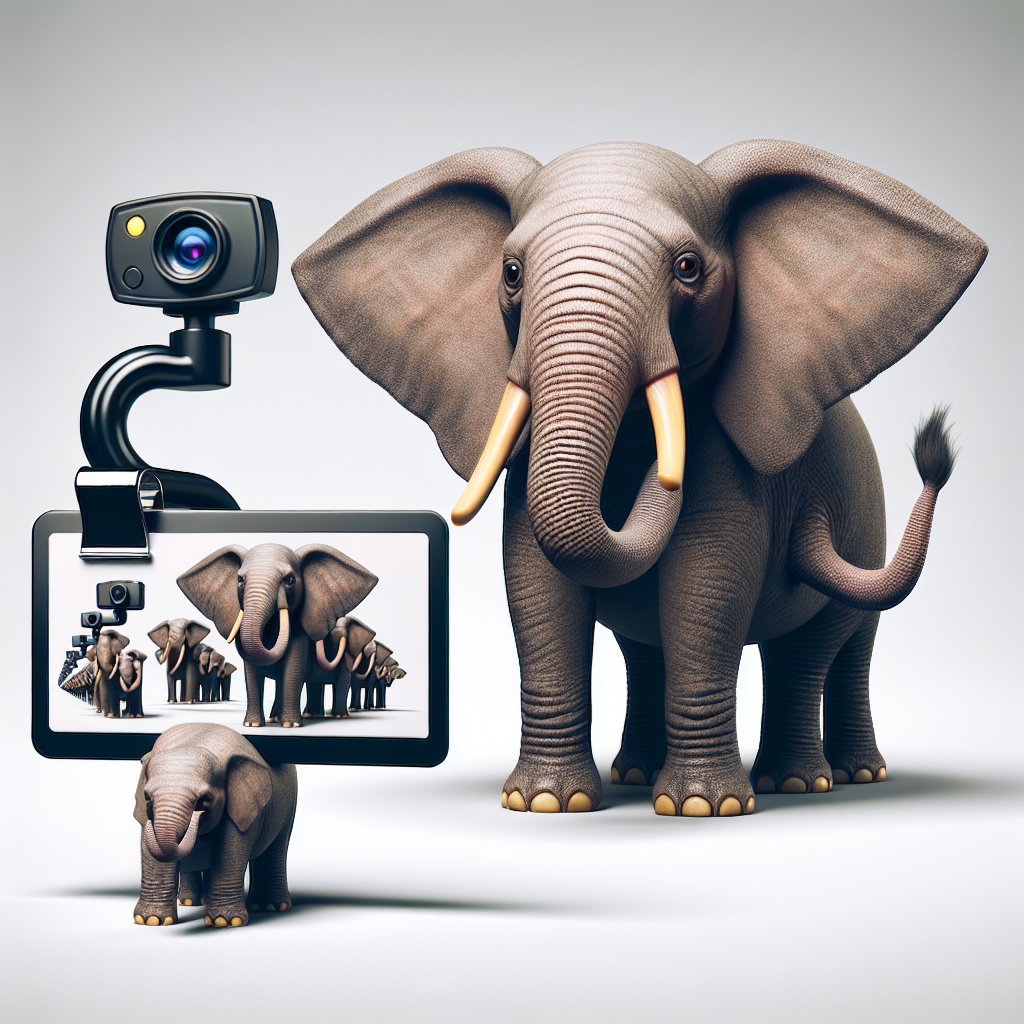

In [ ]:
dalle_image = url_to_image( dalle_url ) # 🚀
print_image( dalle_image )

In the process of producing this image, DALL-E will also produce an elaboration of the prompt we provided, so that this

In [ ]:
print( "{style} {animal}".format(style=style, animal=animal) )

recursive elephant


goes to this

In [ ]:
print( dalle_caption)

A recursive elephant showcasing a unique phenomenon. The elephant is holding an Identity Card up to a high-tech webcam. The recursive element could be portrayed by having a smaller version of the elephant itself captured in the ID photo, which, in turn, holds another slightly smaller ID, creating a seemingly endless cycle of elephants each progressively getting smaller as depicted by the webcam.


## Vision
As if that all isn't enough, we can also interpret images: OpenAI API has an endpoint for interpreting pictures. You can read about its capabilities and limitations [here](https://platform.openai.com/docs/guides/vision).


### Image interpretation


We'll start by seeing how it interprets the image that DALL-E just created.

In [ ]:
image_content = openai_client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Describe this image"},
        {
          "type": "image_url",
          "image_url": {
            "url": dalle_url,
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [ ]:
print(image_content.choices[0].message.content)

This image is a 3D rendering showing a large, realistic elephant staring directly at the viewer. In front of the elephant is an elongated self-portrait setup. There's a device that resembles a camera mounted on a flexible stand affixed to a screen or monitor. The screen displays an image of the elephant multiple times over, creating a recursive visual effect where smaller and smaller images of the elephant appear within each other as if reflecting into infinity.

The overall effect is humorous and whimsical, as it appears as though the elephant is engaging in a self-portrait or "elephant selfie." The lighting and shadows are evenly distributed, suggesting a studio-like environment. The background is a nondescript, uniform color, which draws attention to the central subject.


### OCR
By changing the prompt from "Describe this image" to "Extract the text from this file" we can use the exact same tool to perform optical character recognition.

Run the block below and click the button that pops up to upload an image file that you want to perform OCR on.  

If you don't have anything in mind, you can save and upload [this](https://enfascination.com/htdocs/forever/teaching/1966_SaganMuller.jpg) 1966 letter from astrophysicist Carl Sagan (to his one-time mentor, biologist Herman Müller) explaining why he never pursued becoming an astronaut if he likes space so much, or [this](https://enfascination.com/htdocs/forever/teaching/1998_NSA_Furbies.jpg) recently declassified memo from the US National Security Agency (NSA) forbidding [Furbies](https://en.wikipedia.org/wiki/Furby) in the workplace.

In [ ]:
uploaded_image = FileUpload(multiple=False)
uploaded_image

FileUpload(value={}, description='Upload')

The following code gets the letter into the right format for the OpenAI API, before submitting it with our query: "Extract the text from this file".

In [ ]:
with open('input.jpg', 'wb') as output_file:
  for uploaded_filename in uploaded_image.value:
    content = uploaded_image.value[uploaded_filename]['content']
    output_file.write(content)

In [ ]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Getting the base64 string
base64_image = encode_image('input.jpg')

In [ ]:
text_content = openai_client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Extract the text from this file"},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}",
          },
        },
      ],
    }
  ],
  max_tokens=1000,
)

In [ ]:
print(text_content.choices[0].message.content)

The image displays a letter with the following text:

```
HARVARD COLLEGE OBSERVATORY
CAMBRIDGE 38, MASSACHUSETTS

November 7, 1966

Professor H. J. Muller
Department of Zoology
Jordan Hall 222
University of Indiana
Bloomington, Indiana

Dear Joe,

Many thanks for the kind thoughts about the scientist-astronaut program. I am not too old, but I am too tall. There is an upper limit of six feet! So I guess I'll just stay here on the ground and try to understand what's up in the sky. But a manned Mars expedition -- I'd try and get shrunk a little for that.

With best wishes,

Cordially,
[Signature]
Carl Sagan

CS:sec
```


## DIY audiobook

OpenAI also has a text-to-speech ("TTS") API.  You feed it text and it render it to naturalistic speech.  We're going to use it to create do-it-yourself audiobooks.  We'll use code from earlier in the term to pull down a book from the free library Project Gutenbook (the beginning of "Hamlet" from a copy of *The Complete Works of William Shakespeare*), and then we'll run it through OpenAI's TTS to create a downloadable `mp3` file. It's an audiobook edition of the play!

### Prepare the text
In the code below we'll retrieve "Hamlet" from the internet and then print it out.

In [ ]:
url = "https://www.gutenberg.org/files/100/100-0.txt"  # This is the web address of the book we're interested in.
allOfShakespeare = gutenbergURLToText( url ) # 🚀

In [ ]:
#macbeth_actI_sceneIII = allOfShakespeare[2750673:2757933]
hamlet_actI_sceneI = allOfShakespeare[966207:974543] # I figured out these indices by trial and error
print(hamlet_actI_sceneI)


ACT I

SCENE I. Elsinore. A platform before the Castle.


Enter Francisco and Barnardo, two sentinels.

BARNARDO.
Who’s there?

FRANCISCO.
Nay, answer me. Stand and unfold yourself.

BARNARDO.
Long live the King!

FRANCISCO.
Barnardo?

BARNARDO.
He.

FRANCISCO.
You come most carefully upon your hour.

BARNARDO.
’Tis now struck twelve. Get thee to bed, Francisco.

FRANCISCO.
For this relief much thanks. ’Tis bitter cold,
And I am sick at heart.

BARNARDO.
Have you had quiet guard?

FRANCISCO.
Not a mouse stirring.

BARNARDO.
Well, good night.
If you do meet Horatio and Marcellus,
The rivals of my watch, bid them make haste.

Enter Horatio and Marcellus.

FRANCISCO.
I think I hear them. Stand, ho! Who is there?

HORATIO.
Friends to this ground.

MARCELLUS.
And liegemen to the Dane.

FRANCISCO.
Give you good night.

MARCELLUS.
O, farewell, honest soldier, who hath reliev’d you?

FRANCISCO.
Barnardo has my place. Give you good-night.

[_Exit._]

MARCELLUS.
Holla, Barnardo!

BARNARDO.
Say,

### Text to speech
This code takes the text (or any text) and converts it to an audio file.

In [ ]:
the_text = hamlet_actI_sceneI
# For short texts you only need to call openai_client.audio.speech.create) once
# Above 4096 characters you have to break it up into pieces.
# That is what this code does.
audiobook = AudioSegment.empty()
lloc = 0    # start index of segment
rloc = 4090 # end index of segment
while lloc != rloc:
  rloc = the_text[:(rloc+1)].rfind('\n')
  segment = openai_client.audio.speech.create(
    model="tts-1", # tts-1 or tts-1-hd
    voice="alloy", #  voices are alloy, echo, fable, onyx, nova, and shimmer
    response_format="mp3", # mp3, aac, or flac
    speed="1", # can be faster or slower. Default is 1
    input=hamlet_actI_sceneI[lloc:rloc]
  )
  # Write the segment, attach it to the whole
  segment.stream_to_file("segment.mp3")
  audiobook += AudioSegment.from_mp3("segment.mp3")
  # Update the indices
  lloc = rloc
  next_end = the_text[:(rloc+4090)].rfind('\n')
  actual_end = the_text.rfind('\n')
  rloc = next_end if next_end < actual_end else actual_end

<ipython-input-52-bc230b088062>:18: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  segment.stream_to_file("segment.mp3")
<ipython-input-52-bc230b088062>:18: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  segment.stream_to_file("segment.mp3")
<ipython-input-52-bc230b088062>:18: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  segment.stream_to_file("segment.mp3")


### Download
Now you can download the file for your own DIY audiobook.


In [ ]:
audiobook.export('audiobook.mp3', format='mp3')
files.download('audiobook.mp3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use this code if you're not on Google Colaboratory but some other code notebook provider
#from IPython.display import FileLink
#display(FileLink('audiobook.mp3'))

# Automatic transcription

We can also go the other way, automatically transcribing audio ([in several languages](https://platform.openai.com/docs/guides/speech-to-text/supported-languages)) to English text.

We can start with a well-controlled task, translating the Shakespeare transcript *back* to text.

In [ ]:
audio_file= open("audiobook.mp3", "rb")
transcript = openai_client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)

In [ ]:
print(transcript.text)

Acquorcine Y. Elsinore, a platform before the castle. Enter Francisco and Barnardo, two sentinels. Barnardo. Who's there? Francisco. Nay, answer me. Stand and unfold yourself. Long live the king. Barnardo. He. You come most carefully upon your hour. Tis now struck twelve. Get thee to bed, Francisco. For this relief, much thanks. Tis bitter cold, and I am sick at heart. Have you had quiet guard? Not a mouse stirring. Barnardo. Well, good night. If you do meet Horatio and Marcellus, the rivals of my watch, bid them make haste. Enter Horatio and Marcellus. Fisco. I think I hear them. Stand ho! Who is there? Friends to this ground. Marcellus. And liegeman to the Dane. Give you good night. Oh, farewell, honest soldier, who hath relieved you? Barnardo has my place. Give you good night. Marcellus. Holla, Barnardo. Say what? Is Horatio there? Horatio. A piece of him. Barnardo. Welcome, Horatio. Welcome, good Marcellus. Marcellus. What has this thing appeared again to-night? I have seen nothing

We can compare to the original.

In [ ]:
print(hamlet_actI_sceneI[:300])


ACT I

SCENE I. Elsinore. A platform before the Castle.


Enter Francisco and Barnardo, two sentinels.

BARNARDO.
Who’s there?

FRANCISCO.
Nay, answer me. Stand and unfold yourself.

BARNARDO.
Long live the King!

FRANCISCO.
Barnardo?

BARNARDO.
He.

FRANCISCO.
You come most


## Interview transcription

1. Find an interview recording (25mb limit without more work)
  * or download this [interview](https://enfascination.com/htdocs/forever/teaching/kool_keith_98yrold_refridgerator.mp4) with the rapper Kool Keith.
2. Upload it with this button.
3. Run the code
4. Copy the transcript text.

In [ ]:
uploaded_audio = FileUpload(multiple=False)
uploaded_audio

FileUpload(value={}, description='Upload')

This is short technical code for writing your upload to a file in the notebook environment.

In [ ]:
with open('interview.mp4', 'wb') as output_file:
  for uploaded_filename in uploaded_audio.value:
    content = uploaded_audio.value[uploaded_filename]['content']
    output_file.write(content)

And this code transcribes that file.

In [ ]:
audio_file= open("interview.mp4", "rb")
interview_transcript = openai_client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)

In [ ]:
print(interview_transcript.text)

A 98-year-old Frigidario. You know, it's funny, I like salsa water because I really learned that people like to steal your sodas, they like your yuhus, they like to steal your Hawaiian punch, they like to steal your Dr. Brown. I really learned that salsa water, people don't like it, and I noticed I like it, and the more I saved, the more I had, the more I saved a lot of water. You could sit a big jug of salsa water around and nobody would touch it. It's like, you gotta like salsa water yourself, I love it. That was the thing with me because I think I lost so much yuhus, I lost so much people taking one, people taking one of my Hawaiian punches, people drinking on my Tropicana. I really learned salsa water keeps people away. It's like a twist, like wow, I really don't like it myself, but I like it because people don't like it. You have to do it that way, and that's what a lot of things, especially if you have a house where everybody's youthful and they like everything you like, you gott

# Summary

We learned how to perform in Python a lot of OpenAI functionality that we would normally access manually.  OpenAI's API makes most of it available programmatically.  

With small tweaks to this code, you can learn a lot about the capabilities of modern AI, and smooth out the seams between the worlds of code and people. For example, we've tied together several activities from prior weeks, by converting Shakespeare to text, answering homework questions, and not-quite automating your demo video selfies.

And that's not even all of the functionality.  As you explore [the API](https://platform.openai.com/docs/api-reference?lang=python) more deeply you'll discover it's capabilities for speech transcription, translation, moderation, reading files, and so on. There's a lot, it's very powerful, and quite cheap.

Now that you've been introduced to the OpenAI API, imagine for a moment what you would build if you could build anything.

---

[CC BY](https://creativecommons.org/licenses/by/4.0/) Seth Frey. Credit to [Project Gutenberg](https://www.gutenberg.org/ebooks/100) and YouTuber [djreal](https://www.youtube.com/watch?v=66OQ-GPYfCE).